<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/PCA_(principal_component_analysis)_Reduction_dimension_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)


```
PCA is used to identify and detect correlation between variables(and reduce the dimension)
```



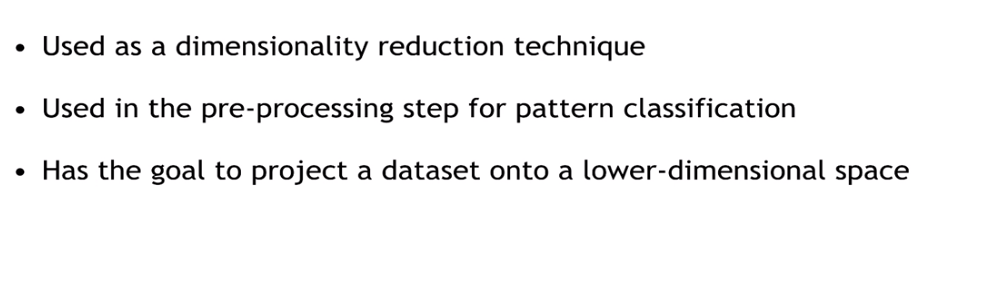

# **Dimenson Reduction**


```
یکی از کاربردهای اصلیِ PCA در عملیاتِ کاهشِ ویژگی (Dimensionality Reduction) است. PCA همان‌طور که از نامش پیداست می‌تواند مولفه‌های اصلی را شناسایی کند و به ما کمک می‌کند تا به جای اینکه تمامیِ ویژگی‌ها را مورد بررسی قرار دهیم، یک سری ویژگی‌هایی را ارزشِ بیشتری دارند، تحلیل کنیم. در واقع PCA آن ویژگی‌هایی را که ارزش بیشتری فراهم می‌کنند برای ما استخراج می‌کند.

 PCA با توجه داده‌ها و دامنه‌ی تغییراتِ هر کدام از آن‌ها، می‌تواند ویژگی‌هایی را انتخاب کند که تاثیر حداکثری در نتیجه نهایی داشته‌ باشند.

 البته این بدان معنا نیست که در فرآیند کاهش ابعاد، PCA دقیقا همان ویژگی‌ را حذف می‌کند. بلکه PCA توان این را دارد که به یک سری ویژگی جدید برسد. مثلا این الگوریتم ممکن است به این نتیجه برسد که افرادی که در شمال و غرب ایران زندگی می‌کنند و سنِ آن‌ها بالای ۴۰سال است، احتمال خرید بالایی دارند در حالی که برعکس این قضیه احتمال خرید را بسیار کمتر می‌کند. در واقع این‌جا PCA به یک ویژگی ترکیبی از محل تولد شخص و سن رسیده است. این دقیقا یکی از قدرت‌های الگوریتم PCA در کار بر روی داده‌ها است.
```



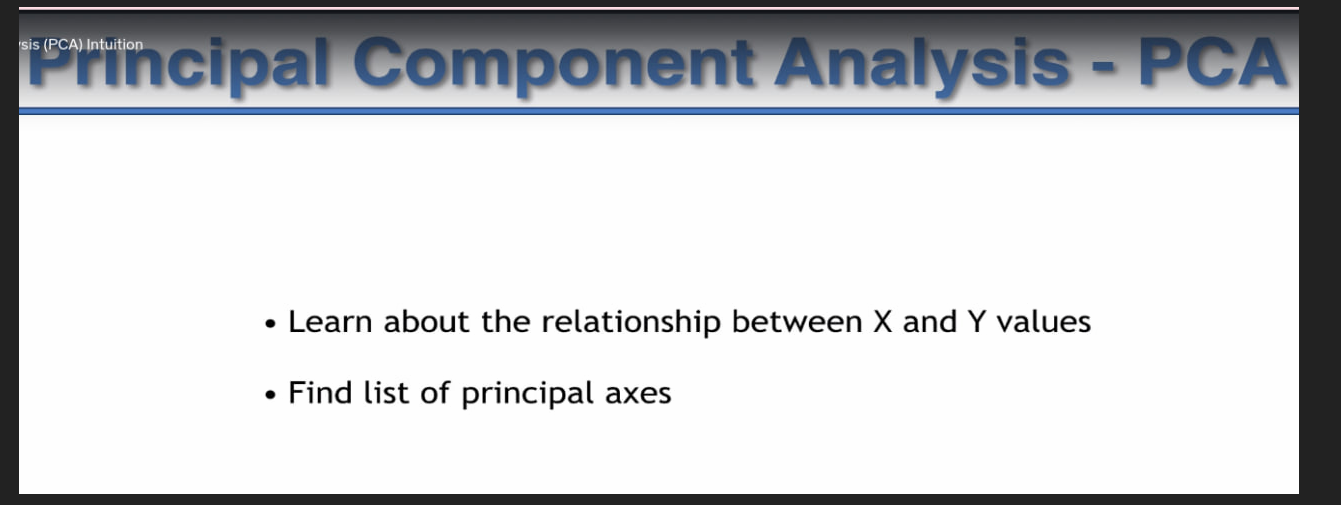

https://chistio.ir/%D8%A2%D9%86%D8%A7%D9%84%DB%8C%D8%B2-%D9%85%D9%88%D9%84%D9%81%D9%87-%D8%A7%D8%B5%D9%84%DB%8C-principal-component-analysis-pca-%DA%86%DB%8C%D8%B3%D8%AA%D8%9F/#:~:text=%DB%8C%DA%A9%DB%8C%20%D8%A7%D8%B2%20%DA%A9%D8%A7%D8%B1%D8%A8%D8%B1%D8%AF%D9%87%D8%A7%DB%8C%20%D8%A7%D8%B5%D9%84%DB%8C%D9%90%20PCA,%D8%A7%D8%B1%D8%B2%D8%B4%D9%90%20%D8%A8%DB%8C%D8%B4%D8%AA%D8%B1%DB%8C%20%D8%AF%D8%A7%D8%B1%D9%86%D8%AF%D8%8C%20%D8%AA%D8%AD%D9%84%DB%8C%D9%84%20%DA%A9%D9%86%DB%8C%D9%85.



```
PCA, or Principal Component Analysis, is a dimensionality reduction technique often used in machine learning and not limited to deep learning. When using PCA, you often come across two main methods: fit_transform and transform. Here's what each does and how they differ:

fit_transform:

Fit: This method computes the mean and principal components which will be used for the dimensionality reduction. This step essentially "trains" the PCA model.
Transform: After fitting, this step applies the dimensionality reduction on the dataset.
When you use fit_transform, you are essentially performing both steps on your data. Typically, you use this method on your training data.

transform:

This method only applies the previously computed mean and principal components to the data. It doesn't re-compute them.
This is typically used on new/unseen data (like a test set). For instance, after you've used fit_transform on your training data, you should only use transform on your test data. This ensures that the test data is transformed in the same way as the training data.

In the context of deep learning or any other machine learning application:

First, use fit_transform on your training dataset to both learn the PCA transformation and apply it.
Then, use transform on your validation/test dataset to apply the same PCA transformation.
Remember, you should never fit PCA or any other pre-processing technique on your test data, as this would be a form of data leakage. Always fit on the training data and then transform the test data.
```



## Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part9_Dimensionality Reduction/Section43-PrinciplwComponentAnalysis(PCA)/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **## Applying PCA**


# **PCA must apply on the dataset Before the training**


```
after PCA we will have more precise prediction
```



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)              #give me 2 principle fature among our dataset's featur # if we have poor result so we must use biger number like 3,4,.. to visualize more detaile.
X_train = pca.fit_transform(X_train)     #we must apply PCA on Training set to predict well and more accurace
X_test = pca.transform(X_test)           #As we know , Test set must have the same format with Training set so we must apply PCA on Test_set as well.

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Making the Confusion Matrix


```
as we can see , the accuracy is amazing it is 0.9  and it just has one incorrect prediction.
```








In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


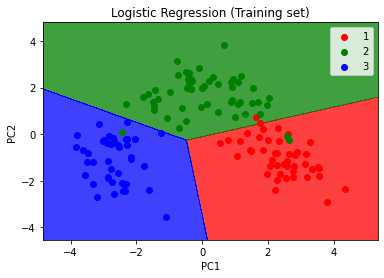

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


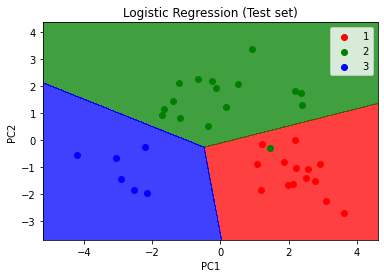

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()